# Hypothesis Testing

Statistical hypothesis testing is a framework for determining whether observed data deviates from what is expected.
We will mainly use **scipy.stats** library.

#### Basics

Test of **significance**: We want to assess the evidence provided by data about some claim concerning a population.

Basic components:

* **Null hypothesis ($H_0$)** : is indeferrent to our claims, assumes nothing interesting is going on between whatever variables we are testing, and attributes the extreme outcomes to pure chance. Represents the status quo in the relevant research field.
* **Alternative/research hypothesis ($H_a$)**: statement that we are trying to prove by consucting the inferential statistics. Normally, we claim that a differencr **DOES** exist between the variables of interest.
* **Test statistic**: to decide between two hypotheses, we shall choose the statistic upon hich we will base our decision.
* **Prob. distribution of the test statistic under the null hypothesis**: setting aside our observed value of the test statistic, we instead focuses on what the value of the statistic might be if the null hypothesis were true 
* **Significance level $\alpha$**: a probability threshold that determines when we _reject_ the null hypothesis. After carrying out a test, if the probability of getting a result as extreme as the one you observe due to chance is lower than the significance level, you reject the null hypothesis in favor of the alternative. This probability of seeing a result as extreme or more extreme than the one observed is known as the **p-value**.

The purpose of a hypothesis test is to determine whether the null hypothesis is likely to be true given sample data. If there is little evidence against the null hypothesis given the data, you accept the null hypothesis. If the null hypothesis is unlikely given the data, you might reject the null in favor of the alternative hypothesis: there is something interesting is going on. The exact form of the alternative hypothesis will depend on the specific test you are carrying out. 





Let's consider a simple example of coin tossing. We flip a coin $n$ times and we observe $h$ heads. We would like to know whether the coin is fair ($H_0$) or biased ($H_a$).

We denote by $B(q)$ the Bernulli distribution with unknown parameter $q$.

Let's suppose that after $n=100$ flips, we get $h=61$ heads. We choose a significance level of $0.05$: is the coin fair or not? 

According to $H_0$: $q = 1/2$.

In [106]:
import numpy as np
import scipy.stats as st
import scipy.special as sp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

n = 100  # number of coin flips
h = 61  # number of heads
q = .5  # null-hypothesis of fair coin



If $\bar{X} is the sample mean, the z-score is the normalised version of the sample mean. 
Let us compute the **z-score** given the data and the significance level

In [107]:
xbar = float(h)/n #estimated mean of the distribution
z = (xbar - q) * np.sqrt(n / (q*(1-q)))
print(z)

2.2



According to the null hypothesis, what is the probability that the z-score will be higher than some quantity $z_0$?

This probability is called the (two-sided) **p-value**. According to the central limit theorem, the z-scoret approximately follows a standard Gaussian distribution N(0,1) for large n, so we have
$$p = P[\|z\| > z_0] = 2P[z > z_0] \approx 2* (1-\Phi(z_0)),$$

where $\Phi$ the cummulative distribution of the standard normal distribution.

So after computing z-score from the data, considering a significance level, we compute the $p-value$ of the calculated z-score.



In [108]:
pval = 2 * (1 - st.norm.cdf(z))
print(pval)

0.027806895027


If $p \text{ value} < \alpha$ ---> **_reject $H_0$_**

![title](http://ipython-books.github.io/images/gaussian.png)

## Statistical Tests
*Compare two means from different distributions assuming they are independent and have same standard deviation:**z-test**



### One sided and two sided tests

Considering a test statistic e.g. two means $\mu_A$ and $\mu_B$:
* **one sided** test claims: $\mu_A < \mu_B$
* **two sided** tests claims: $\mu_A < \mu_B$ or $\mu_A > \mu_B$ 

### p -value
Probability that the test will **correctly reject a false null hypothesis**.

A p-value measures the strenght of evidence against a hypothesis:
* if p-value is small, then either $H_0$ is false OR we got a really extreme/biased sample
* the smaller the p-value is, the more convincing the evidence is against the null hypothesis

## Student's T-Test

For investigiting differences between sample and population means.

### One-sample T-Test: testing the value of a population mean

A one-sample t-test checks whether a sample mean differs from the population mean.

**[stats.ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp)** function tests if the population mean (which we already know) is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic and the p-value.(considers a two sided test)




In [109]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [110]:
np.random.seed(6)
#Population of Germany
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

goettingen_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
goettingen_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
goettingen_ages = np.concatenate((goettingen_ages1, goettingen_ages2))

print('Germany mean age: %.3f' %population_ages.mean() )
print( 'Goettingen mean age: %.3f' %goettingen_ages.mean() )

Germany mean age: 43.000
Goettingen mean age: 39.260


Here we know that we used a slightly different combination of distributions to generate the sample data for Goettingen, so we know that the two means are different. We will conduct a t-test at a $95\%$ confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the population.



In [111]:
stats.ttest_1samp(a= goettingen_ages,               # Sample data
                 popmean= population_ages.mean())  # Pop mean

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

The test result shows the test statistic "t" is equal to -2.574. 
**This test statistic tells us how much the sample mean deviates from the null hypothesis.**

If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with **stats.t.ppf()**:

In [112]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=len(goettingen_ages)-1)  # Degrees of freedom

-2.0095752344892093

In [113]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=len(goettingen_ages)-1)  # Degrees of freedom

2.0095752344892088

We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:

In [114]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Mupltiply by two for two tailed test*

0.013121066545690117

**Note**: The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean. Since the sample could differ in either the positive or negative direction we multiply the by two.

Notice this value is the same as the p-value listed in the original t-test output. A p-value of 0.01311 means we'd expect to see data as extreme as our sample due to chance about 1.3% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture population mean:

In [115]:
sigma = goettingen_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = goettingen_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(36.369669080722176, 42.15033091927782)

On the other hand, since there is a 1.3% chance of seeing a result this extreme due to chance, it is not significant at the 99% confidence level. This means if we were to construct a 99% confidence interval, it would capture the population mean:

In [116]:
stats.t.interval(alpha = 0.99,                # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = goettingen_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(35.405479940921069, 43.114520059078927)

###  2-sample t-test: testing for difference across populations
Test wether the difference of the means of 2 different samples is significant.

Here, the $H_0$ assumes that the **means of both groups are the same**. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means. 

**[stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html) ** function.



Let's generate a sample of voter age data for Wisconsin and test it against the sample we made earlier:




In [117]:
np.random.seed(12)
berlin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
berlin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
berlin_ages = np.concatenate((berlin_ages1, berlin_ages2))

print( berlin_ages.mean() )

42.8


In [118]:
stats.ttest_ind(a= goettingen_ages,
                b= berlin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.090731043439577483)

The test yields a p-value of 0.0907, which means there is a 9% chance we'd see sample data this far apart if the two groups tested are actually identical. 

If we were using a $95\%$ confidence level we would **fail to reject the null hypothesis**, since the p-value is greater than the corresponding significance level of $5\%$.

Usually before proceeding with the t-test, we might want to evaluate the sample variances of the two groups, using the **Fisher's f-test** to verify the homoskedacity (homogeneity of variances).

In [119]:
F = np.std(goettingen_ages)**2 / np.std(berlin_ages)**2  # F-statistic
df1 = len(goettingen_ages) - 1
df2 = len(berlin_ages) - 1
alpha = 0.05 
p_value = stats.f.cdf(F, df1, df2)
if p_value > alpha:
    print("Reject the null hypothesis that Var(X) == Var(Y)")

Reject the null hypothesis that Var(X) == Var(Y)


## Paired tests: repeated measurements on the same individual

The former test assumes testing differences between *independent* groups. 
If we are interested in testing differences between samples of the same group at different points in time we use paired tests. (e.g. checking blod pressure on the same sample before and after treatment)

**[stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html) **

*(This is equivalent to a 1-sample test on the difference of the two samples assuming zero known population mean)*


Let us consider a contrived example. We would like to test whethr a weight-loss drug works. We create dummy before and after weights:

In [120]:
np.random.seed(11)

before= stats.norm.rvs(scale=10, loc=85, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_after,weight_before,weight_change
count,100.000000,100.000000,100.000000
mean,83.884807,85.115182,-1.230375
std,10.423714,9.377513,4.783696
min,53.980301,58.466814,-11.495286
25%,76.612388,78.473681,-4.046211
50%,84.429677,85.276935,-1.413463
75%,91.015628,91.879048,1.738673
max,108.586869,106.566744,9.759282


We observe an average weight loss of 1.23 kilos after treatment. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level. 

In [121]:
stats.ttest_rel(a = weight_df["weight_before"], b = weight_df["weight_after"])

Ttest_relResult(statistic=2.5720175998568315, pvalue=0.011596444318439753)

The p-value in the test output shows that the chances of seeing this large of a difference between samples due to chance is around 1%, so we reject the null hypothesis of the two means being equal.

## Chi-Squared Test

Similar to 1-sample t-test but for categorical variables.
e.g. to test whether the ethnicity demographigs of Goettingen matches the ethnicity demographics of Germany.

In [122]:
import numpy as np
import pandas as pd
import scipy.stats as stats



national = pd.DataFrame(["german"]*100000 + ["polish"]*60000 +\
                        ["spanish"]*50000 + ["chinese"]*15000 + ["other"]*35000)
           

goettingen = pd.DataFrame(["german"]*600 + ["polish"]*300 + \
                         ["spanish"]*250 +["chinese"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
goettingen_table = pd.crosstab(index=goettingen[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Goettingen")
print(goettingen_table)




National
col_0     count
0              
chinese   15000
german   100000
other     35000
polish    60000
spanish   50000
 
Goettingen
col_0    count
0             
chinese     75
german     600
other      150
polish     300
spanish    250


The statistic compares the actual observed count of each subgroup with the expected count based on the population distribution. 
Thus we have to compute the expected counts

In [123]:
expected = national_table* len(goettingen)/len(national)

 


In [124]:
stats.chisquare(f_obs= goettingen_table,   # Array of observed counts
                f_exp= expected)   # Array of expected counts



Power_divergenceResult(statistic=array([ 18.19480519]), pvalue=array([ 0.00113047]))

Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a critical value based on the chi-square distribution. Let's find the critical value for 95% confidence level and check the p-value of our result

In [125]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

Critical value
9.48772903678


Since the chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

## Wilcoxon  RankSum test

The Wilcoxon test is a useful test to determine if two distributions are significantly different or not. Unlike the t-test, the RankSum test does not assume that the data are normally distributed.

[**stats.wilcoxon()**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)

## One-way analysis of variance (ANOVA)

If you need to compare **more than two groups** at a time, an ANOVA is your best bet. For example, we have the results from three experiments with overlapping 95% confidence intervals, and we want to confirm that the results for all three experiments are not significantly different.

For example, if we wanted to test whether voter age differs based on some categorical variable like ethnicity, we have to compare the means of each level or group the variable.

One-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable.  
**Does any of the group means differ from the others?**

Here we use the [F-distribution](https://en.wikipedia.org/wiki/F-distribution).

 Let's generate some fake voter age and demographic data and use the ANOVA to compare average ages across the groups:

In [126]:
np.random.seed(12)

ethnicity =   ["chinese","spanish","polish","other","german"]

# Generate random data
voter_ethnicity = np.random.choice(a= ethnicity,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by ethnicity
voter_frame = pd.DataFrame({"ethnicity":voter_ethnicity,"age":voter_age})
groups = voter_frame.groupby("ethnicity").groups

# Etract individual groups
chinese = voter_age[groups["chinese"]]
spanish = voter_age[groups["spanish"]]
polish = voter_age[groups["polish"]]
other = voter_age[groups["other"]]
german = voter_age[groups["german"]]

# Perform the ANOVA
stats.f_oneway(chinese, spanish, polish, other, german)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The test output yields an F-statistic of 1.774 and a p-value of 0.1317, indicating that there is no significant difference between the means of each group.


Now let's make new age data where the group means do differ and run a second ANOVA:

In [127]:
np.random.seed(12)

# Generate random data
voter_ethnicity = np.random.choice(a= ethnicity,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_ethnicity=="german", white_ages, voter_age)

# Group age data by ethnicity
voter_frame = pd.DataFrame({"ethnicity":voter_ethnicity,"age":voter_age})
groups = voter_frame.groupby("ethnicity").groups   

# Extract individual groups
chinese = voter_age[groups["chinese"]]
spanish = voter_age[groups["spanish"]]
polish = voter_age[groups["polish"]]
other = voter_age[groups["other"]]
german = voter_age[groups["german"]]

# Perform the ANOVA
stats.f_oneway(chinese, spanish, polish, other, german)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. We know that it is the white voters who differ because we set it up that way in the code, but when testing real data, you may not know which group(s) caused the the test to throw a positive result. To check which groups differ after getting a positive ANOVA result, you can perform a follow up test or "post-hoc test".

One post-hoc test is to perform a separate t-test for each pair of groups, with adjusted significance levels considering the number of comparisons made ([Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction)).

A further option would be to curry out **Tukey's test** using the **[pairwise_tukeyhsd()](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)** function in the statsmodels.stats.multicomp library.

group1,group2,meandiff,lower,upper,reject
chinese,german,1.9547,-0.4575,4.3668,False
chinese,other,-1.0645,-4.2391,2.11,False
chinese,polish,0.4143,-2.1011,2.9297,False
chinese,spanish,-0.8032,-3.4423,1.836,False
german,other,-3.0192,-5.2941,-0.7443,True
german,polish,-1.5404,-2.734,-0.3468,True
german,spanish,-2.7579,-4.194,-1.3217,True
other,polish,1.4789,-0.9053,3.863,False
other,spanish,0.2614,-2.253,2.7757,False
polish,spanish,-1.2175,-2.821,0.386,False


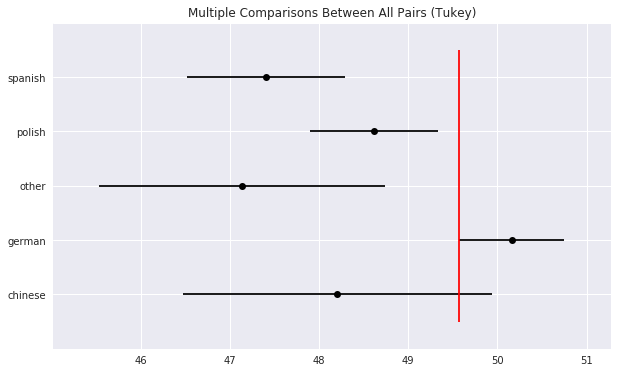

In [128]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_ethnicity,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()      

The output of the Tukey test shows the average difference, a confidence interval as well as whether you should reject the null hypothesis for each pair of groups at the given significance level. In this case, the test suggests we reject the null hypothesis for 3 pairs, with each pair including the "german" category. This suggests the german group is likely different from the others. The 95% confidence interval plot reinforces the results visually: only 1 other group's confidence interval overlaps the white group's confidence interval.

## Type I and type II errors

The result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. Incorrect conclusions made from hypothesis tests fall in one of two categories: type I error and type II error.

* **Type I** (false positive - $\alpha$) falsely concluding a statistical significant relationship DOES exist, when in fact it DOES NOT.
* **Type II** (false negative - $\beta$) failing to detect a statistically significant relationship when in fact one DOES exist.

During the hypothesis testing, $\alpha$ is the probability of occurence of a type I error (i.e. rejecting $H_0$ although it is true), while $\beta$ the probability of occurence of a type II error (missing a significant result). 

For a fixed sample size, the lower we set the value of $\alpha$, the higher the value of $\beta$ will be.

![title](https://effectsizefaq.files.wordpress.com/2010/05/type-i-and-type-ii-errors.jpg?w=300&h=225)



To be considered statistically significant, the probability of obtaining a value of the test statistic must be smaller than the probability for committing a Type I error. In other words, the probability (p) must be less than what you have chosen for your alpha value (e.g. 0.05). 
> So in most cases we may conclude that a claim is statistically significant if the test returns a $p<0.05$.

If a statistical significance is found, we conclude that the observed relationship is too great to exist just by chance.

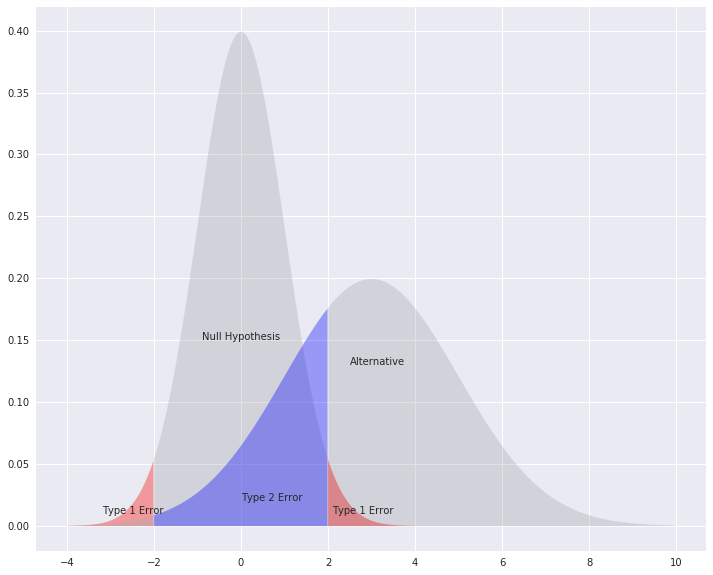

In [129]:

plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='#a7aaaf',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='#a7aaaf',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='#a7aaaf',lw=3,
                 alpha=0.35)

plt.text(x=-0.9, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

 Note that the Type II error rate is the area under the alternative distribution within the quantiles determined by the null distribution and the confidence level.

### Relationship between confidence intervals, alpha and p values:

* p-values may be referenced to alpha, or the chance of making a Type I error
* a $95\%$ confidence interval will reject any value of the null hypothesis that is outside the interval at a $5\%$ significance level for a two-sided test.
* a larger sample size with the same sample mean will result in a smaller p-value, i.e. stronger evidence!

## Exercises




* The file "brain_size.csv" contains data from a study on the relationship between brain size and weight and intelligence (Willerman et al. 1991).

  * Load the data file from "http://www.scipy-lectures.org/_downloads/brain_size.csv"
  * Store the data in a dataframe and inspect for missing values
  * Calculate the mean value for full IQ for all the participants and for males/females seperately
   * Plot the data. (hint: use plotting.scatter_matrix from pandas.tools)
   * Plot the scatter matrix for males only, and for females only. Do you think that the 2 sub-populations correspond to gender?
   * Does the population have zero 'VIQ' mean? Perform an appropriate test to decide.
   * The mean 'VIQ' values for males and females differ. Perform an appropriate test to decide whether this differnce is significant.
   * Test whether 'FISQ' and 'PIQ' are significantly different. (Hint: You have to consider that both observations are measured on the same individuals)
   * Test the difference between weights in males and females.
   * Test if the VIQ of male and female are different after removing the effect of brain size, height and weight. (Hint: ANOVA)


* A bottle filling machine is set to fill bottles with soft drink to a volume of 500 ml. The actual volume is known to follow a normal distribution. The manufacturer believes the machine is under-filling bottles. A sample of 20 bottles is taken and the volume of liquid inside is measured. The results are given in the [bottles](http://www.instantr.com/wp-content/uploads/2012/11/bottles.csv) dataset. Perform the appropriate test to determine whether the bottles are being consistently under filled. The manufacturer is specifically interested in knowing whether the volume is less than 500 ml.

* In the dataset "[immer](https://github.com/vincentarelbundock/Rdatasets/blob/master/csv/MASS/immer.csv)" the barley yield in years 1931 and 1932 of the same field are recorded. Assuming that the data in immer follows the normal distribution, find the 95% confidence interval estimate of the difference between the mean barley yields between years 1931 and 1932. (hint: remeber to perform an f-test first)

* In the dataset "[**parasite_data**](https://github.com/briandconnelly/BEACONToolkit/blob/master/analysis/scripts/data-analysis-python/parasite_data.csv)" we have measurements for 3 variables "virulence, replicate, and ShannonDiversity". For our purposes, all we care is that the first two columns (Virulence and Replicate) are the experimental predictors, and the third column (ShannonDiversity) is the measured response from the experiment. Thus, we are interested in what effects Virulence and/or Replicate have on the measured ShannonDiversity. 
 - Perform a test to identify whether the results for virulence treatment at level 0.5 and 0.8 are signifficantly different from each other.
 - Repeat the same test for levels 0.6 and 0.7.
 - Now compare all these treatments together to identify whether the results of one treatment significantly differs from the others.